# Техническое задание

### В файле «data.xlsx» представлены данные по поступлению денежных средств от
### клиентов компании N за покупку ее услуг.

#### client_id - ID клиента;
#### sum – сумма денежных средств;
#### status – статус оплаты;
#### sale – менеджер, заключивший сделку;
#### new/current – статус сделки;
#### document – наличие оригинала подписанного договора с клиентом;
#### receiving_date – дата получения оригинала договора.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### Загружаю данные из файла

In [2]:
data = pd.read_excel('C:/Users/Марина/Desktop/data.xlsx')

##### Проведу предобработку данных

In [3]:
data.shape

(730, 8)

In [4]:
data.nunique()

client_id         212
sum               504
status             11
sale               12
new/current         3
Unnamed: 5          0
document            3
receiving_date    111
dtype: int64

In [5]:
data.isnull().sum()

client_id           6
sum                 6
status              0
sale                6
new/current         6
Unnamed: 5        730
document           21
receiving_date    123
dtype: int64

##### Заменю значения NaN на нули

In [6]:
data[['client_id', 'sum', 'receiving_date']] = data[['client_id', 'sum', 'receiving_date']].fillna(0)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       730 non-null    float64
 1   sum             730 non-null    float64
 2   status          730 non-null    object 
 3   sale            724 non-null    object 
 4   new/current     724 non-null    object 
 5   Unnamed: 5      0 non-null      float64
 6   document        709 non-null    object 
 7   receiving_date  730 non-null    object 
dtypes: float64(3), object(5)
memory usage: 45.8+ KB


##### Преобразую столбец 'receiving_date' в тип datetime

In [8]:
data['receiving_date'] = pd.to_datetime(data['receiving_date'], errors='coerce')

## Вопросы:

### 1) Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных 
### средств которых не просрочен.

##### Отфильтрую данные для сделок, приход денежных средств которых не просрочен и соответствует июлю 2021 года

In [9]:
July_data = data[(data['status'] == 'ОПЛАЧЕНО') & (data['receiving_date'].dt.month == 7) & (data['receiving_date'].dt.year == 2021)]

##### Вычисляю общую выручку для отфильтрованных данных

In [10]:
total_revenue = July_data['sum'].sum()
total_revenue_rounded = round(total_revenue, 2)

In [11]:
print('Общая выручка за июль 2021 года по сделкам без просрочки:', total_revenue_rounded)

Общая выручка за июль 2021 года по сделкам без просрочки: 757830.74


### 2) Как изменялась выручка компании за рассматриваемый период?
### Проиллюстрируйте графиком.

##### Группирую данные по дате и вычисляю общую выручку для каждой даты

In [12]:
revenue_by_date = July_data.groupby('receiving_date')['sum'].sum().reset_index()

##### Создам график с помощью Seaborn

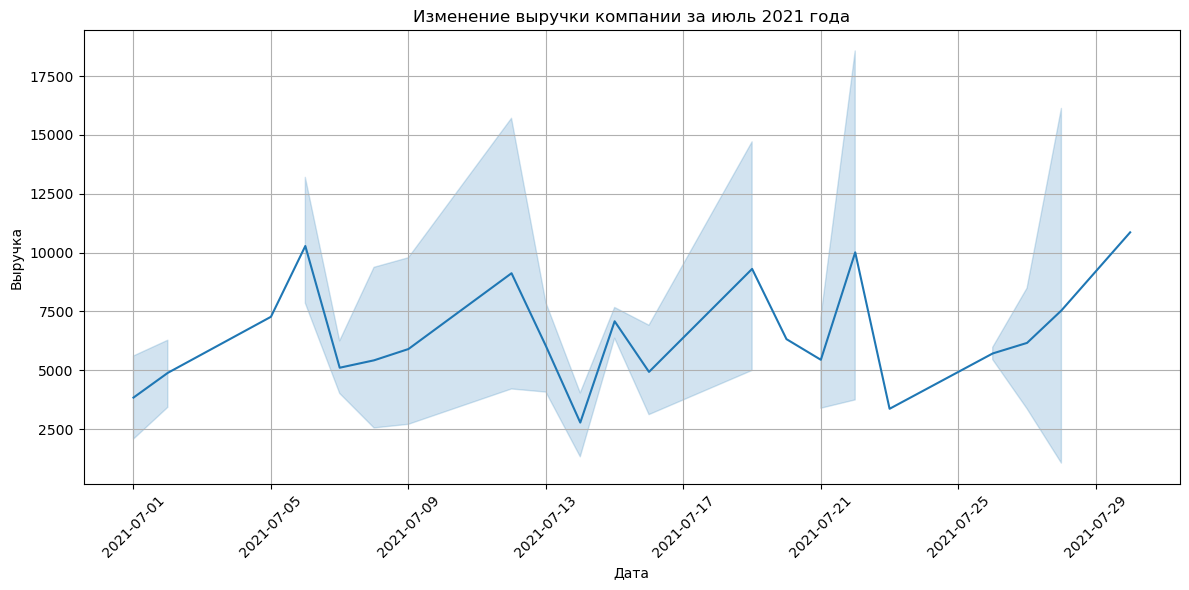

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=July_data, x='receiving_date', y='sum')
plt.title('Изменение выручки компании за июль 2021 года')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3) Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?

##### Фильтрую данные для сделок, приход денежных средств которых не просрочен и соответствует сентябрю 2021 года

In [16]:
september_data = data[(data['status'] == 'ОПЛАЧЕНО') & (data['receiving_date'].dt.month == 9) & (data['receiving_date'].dt.year == 2021)]

##### Группирую данные по менеджерам и определяю суммы сделок

In [17]:
manager_revenue = september_data.groupby('sale')['sum'].sum().reset_index()

##### Нахожу менеджера с наибольшей выручкой

In [18]:
top_manager = manager_revenue.loc[manager_revenue['sum'].idxmax()]

In [19]:
print("Менеджер, привлекший наибольшую выручку в сентябре 2021 года:", top_manager['sale'])
print("Сумма выручки:", top_manager['sum'])

Менеджер, привлекший наибольшую выручку в сентябре 2021 года: Петрова
Сумма выручки: 210386.42


### 4) Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

##### Фильтрую данные для сделок, соответствующие октябрю 2021 года

In [21]:
october_data = data[(data['receiving_date'].dt.month == 10) & (data['receiving_date'].dt.year == 2021)]

##### Определяю преобладающий тип сделок

In [22]:
prevailing_type = october_data['new/current'].mode().values[0]

In [23]:
print("Преобладающий тип сделок в октябре 2021 года:", prevailing_type)

Преобладающий тип сделок в октябре 2021 года: текущая


### 5) Сколько оригиналов договора по майским сделкам было получено в июне 2021?

##### Фильтрую данные для сделок, соответствующие майским сделкам и июню 2021 года

In [24]:
may_data = data[(data['receiving_date'].dt.month == 5) & (data['receiving_date'].dt.year == 2021)]
june_data = data[(data['receiving_date'].dt.month == 6) & (data['receiving_date'].dt.year == 2021)]

##### Отфильтрую по столбцу 'document' для оригиналов

In [25]:
originals_in_june = june_data[june_data['document'] == 'оригинал']['document'].count()

In [26]:
print("Количество оригиналов договора, полученных в июне 2021 года по майским сделкам:", originals_in_june)

Количество оригиналов договора, полученных в июне 2021 года по майским сделкам: 76


# Задание

#### За каждую заключенную сделку менеджер получает бонус, который рассчитывается
#### следующим образом.
#### 1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус
#### оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с
#### клиентом (в рассматриваемом месяце).
#### 2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс.,
#### и 3 % от суммы, если меньше. При этом статус оплаты может быть любым,
#### кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного
#### договора с клиентом (в рассматриваемом месяце).
#### Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого
#### месяца, считаются остатком на следующий период, который выплачивается по мере
#### прихода оригиналов. Вычислите остаток каждого из менеджеров на 01.07.2021.

##### Создам столбец 'bonus', который будет содержать бонус для каждой сделки

In [27]:
data['bonus'] = 0

##### Рассчитаю бонусы для каждой сделки

In [28]:
for index, row in data.iterrows():
    if row['receiving_date'].month == 6 and row['receiving_date'].year == 2021:
        if row['new/current'] == 'новая' and row['status'] == 'ОПЛАЧЕНО' and row['document'] == 'оригинал':
            bonus = 0.07 * row['sum']
        elif row['new/current'] == 'текущая' and row['document'] == 'оригинал':
            if row['sum'] > 10000:
                bonus = 0.05 * row['sum']
            else:
                bonus = 0.03 * row['sum']
        else:
            bonus = 0
        data.at[index, 'bonus'] = bonus

##### Сгруппирую данные по менеджерам и посчитаю сумму бонусов для каждого менеджера

In [29]:
manager_bonus = data.groupby('sale')['bonus'].sum().reset_index()

In [135]:
print(manager_bonus)

          sale      bonus
0            -     0.0000
1      Андреев  2962.1717
2     Васильев   339.2310
3       Иванов  2503.8390
4    Кузнецова  2604.6716
5     Михайлов     0.0000
6      Петрова  7028.8020
7        Попов     0.0000
8    Селиванов   353.3220
9      Смирнов  4078.7240
10     Соколов     0.0000
11  Филимонова   306.0720
